# Udacity CAREER DEVELOPMENT

## &#x1F3E2; &nbsp; Technical Interview Practice. Project

### &#x1F4D1; &nbsp; Links
#### Classes (python): https://docs.python.org/3.3/tutorial/classes.html
#### Data structures: https://docs.python.org/2/tutorial/datastructures.html
#### Problem Solving with Algorithms and Data Structures using Python: https://interactivepython.org/runestone/static/pythonds/index.html
#### NetworkX: https://networkx.github.io/documentation/networkx-1.10/overview.html

###  &#x1F4D1; &nbsp; Question 1
Given two strings s and t, determine whether some anagram of t is a substring of s.

For example: if s = "udacity" and t = "ad", then the function returns True.

Your function definition should look like: question1(s, t) and return a boolean True or False.

###  &#x1F4D1; &nbsp; Solution 1

In [557]:
import numpy as np
def question1(s, t):
    result = True
    for element in list(t):
        boolean = element in list(s)
#        print (boolean)
        result = np.logical_and(result, boolean)
    return result

### &#x1F52C; &nbsp; Test 1

In [558]:
s = "udacity"
t = ["cit", "ad", "mod"]
for el in t:
    print (el, "in", s, ":", question1(s, el))

cit in udacity : True
ad in udacity : True
mod in udacity : False


### &#x1F52C; &nbsp;  Explanation 1

###  &#x1F4D1; &nbsp; Question 2
Given a string a, find the longest palindromic substring contained in a.

Your function definition should look like question2(a), and return a string.

###  &#x1F4D1; &nbsp; Solution 2

In [559]:
# Solution with helper functions
def question2(a):
    result = search_palindrome_in(a)
    if (len(list(a)) == 0):        
        return '' 
    elif (len(list(a)) == 1) | (result == []):
        if 'a' in list(a):
            return 'a'
        else:
            return None
    else:
        max_length = max(len(s) for s in result)
        longest_result = [s for s in result if len(s) == max_length]
        return longest_result[0]

def search_palindrome_in(string):
    palindromes = []
    cuts = cut_collection(string)
    for element in cuts:
        substrings = sub_collection(element)
        for el in substrings:
            if is_palindrome(el):
                palindromes.append(el)
    return palindromes
    
def is_palindrome(string):
    if string == "":
        return True
    else:
        if string[0] == string[-1]:
            return is_palindrome(string[1:-1])
        else:
            return False
        
def sub_collection(string):
    sub_string = list(string)
    sub_collection = []
    for i in range(len(sub_string)+1):
        join_string = "".join(sub_string[:i])
        sub_collection.append(join_string )   
    sub_collection = sub_collection[2:len(sub_string)+1]
    return sub_collection     

def cut_collection(string):
    cut_collection = []
    current = string
    for i in range(len(list(string))+1):
        cut_collection.append(current)
        cut_string = current[1:]
        current = cut_string
    cut_collection = cut_collection[:len(list(string))-1]
    return cut_collection

### &#x1F52C; &nbsp; Test 2

In [560]:
test_cases = ['', 'test', 'mart', 'letter', 'parallelogram', 'radarrotator']
for test in test_cases:   
#    print (list(test))
#    print (string_collection(test))
#    print (cut_collection(test))
#    print (search_palindrome_in(test))
    print (question2(test))


None
a
ette
ara
rotator


### &#x1F52C; &nbsp; Explanation 2

###  &#x1F4D1; &nbsp; Question 3
Given an undirected graph G, find the minimum spanning tree within G.

A minimum spanning tree connects all vertices in a graph with the smallest possible total weight of edges. 

Your function should take in and return an adjacency list structured like this:

In [561]:
{'A': [('B', 2)],
 'B': [('A', 2), ('C', 5)], 
 'C': [('B', 5)]}

{'A': [('B', 2)], 'B': [('A', 2), ('C', 5)], 'C': [('B', 5)]}

Vertices are represented as unique strings. The function definition should be question3(G)

###  &#x1F4D1; &nbsp; Solution 3

In [562]:
import networkx as nx
from collections import OrderedDict
import matplotlib.pyplot as plt
% matplotlib inline

In [563]:
def question3(G):
    GW = create_wgraph(G)
    MST = nx.minimum_spanning_tree(GW)
    D = create_wdictionary(MST)
    OD = OrderedDict(sorted(D.items(), key=lambda t: t[0]))
    return OD

def create_wgraph(G):
    W = nx.Graph()
    for n, edges in G.items():
        for (u,v) in edges:
            W.add_edge(n, u, weight=v)
    return W

def create_wdictionary(W):
    D ={}
    Ws = nx.get_edge_attributes(W,'weight')
    for ((u,v), n) in Ws.items():
        D[u] = [(v, n)]
    return D

### &#x1F52C; &nbsp;  Test 3

In [564]:
G = {'A': [('B', 2), ('D', 6), ('G', 4)],
     'B': [('A', 2), ('C', 5)], 
     'C': [('B', 5)],
     'D': [('B', 3), ('C', 4)],
     'E': [('C', 5), ('D', 8)],
     'F': [('C', 3), ('E', 7)],
     'G': [('B', 5), ('D', 5), ('F', 1)]}

WG = create_wgraph(G)
weights = nx.get_edge_attributes(WG,'weight')
print (weights)
print('')
print ('-----------------------------------------------------------------------------------------------------------')
print('')
MST = nx.minimum_spanning_tree(WG)
weightsMST = nx.get_edge_attributes(MST,'weight')
print (weightsMST)
print('')
print ('-----------------------------------------------------------------------------------------------------------')
print('')
print (create_wdictionary(MST))
print('')
print ('-----------------------------------------------------------------------------------------------------------')
print('')
print (question3(G))

{('D', 'C'): 4, ('F', 'C'): 3, ('A', 'D'): 6, ('G', 'B'): 5, ('D', 'B'): 3, ('F', 'G'): 1, ('B', 'C'): 5, ('A', 'B'): 2, ('E', 'F'): 7, ('G', 'D'): 5, ('E', 'D'): 8, ('E', 'C'): 5, ('G', 'A'): 4}

-----------------------------------------------------------------------------------------------------------

{('A', 'B'): 2, ('F', 'C'): 3, ('B', 'D'): 3, ('F', 'G'): 1, ('E', 'C'): 5, ('G', 'A'): 4}

-----------------------------------------------------------------------------------------------------------

{'A': [('B', 2)], 'B': [('D', 3)], 'F': [('G', 1)], 'G': [('A', 4)], 'E': [('C', 5)]}

-----------------------------------------------------------------------------------------------------------

OrderedDict([('A', [('B', 2)]), ('B', [('D', 3)]), ('E', [('C', 5)]), ('F', [('G', 1)]), ('G', [('A', 4)])])


{('D', 'C'): 4, ('F', 'C'): 3, ('A', 'D'): 6, ('G', 'B'): 5, ('D', 'B'): 3, ('F', 'G'): 1, ('B', 'C'): 5, ('A', 'B'): 2, ('E', 'F'): 7, ('G', 'D'): 5, ('E', 'D'): 8, ('E', 'C'): 5, ('G', 'A'): 4}


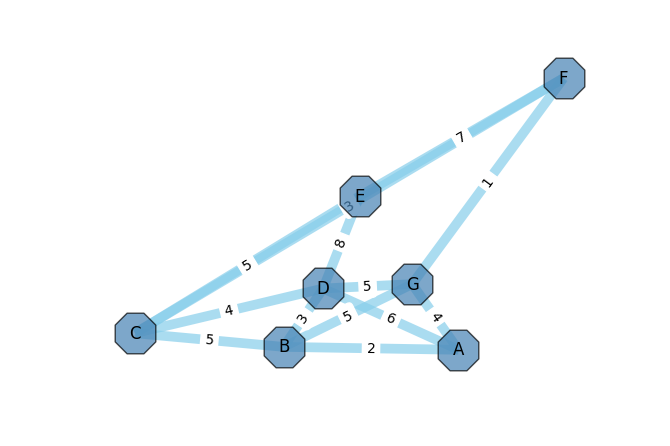

In [538]:
pos=nx.fruchterman_reingold_layout(WG)
nx.draw(WG, pos, with_labels=True, node_shape='8', node_size=1000, 
        node_color='steelblue', edge_color='skyblue', width=7, alpha=0.7)
nx.draw_networkx_edge_labels(WG, pos, edge_labels=weights)
print (weights)

{('A', 'B'): 2, ('F', 'C'): 3, ('B', 'D'): 3, ('F', 'G'): 1, ('E', 'C'): 5, ('G', 'A'): 4}


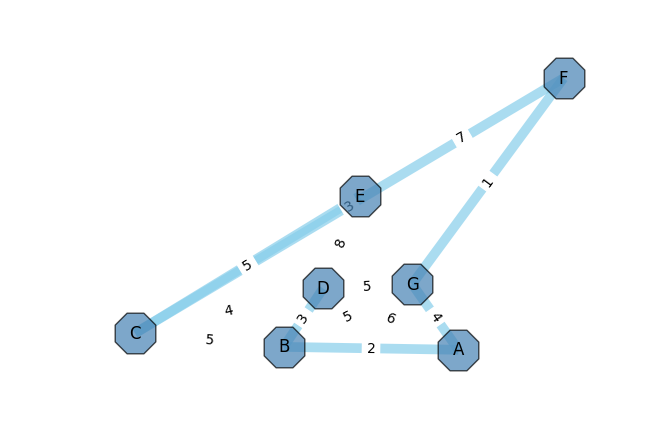

In [539]:
nx.draw(MST, pos, with_labels=True, node_shape='8', node_size=1000, 
        node_color='steelblue', edge_color='skyblue', width=7, alpha=0.7)
nx.draw_networkx_edge_labels(WG, pos, edge_labels=weights)
print (weightsMST)

### &#x1F52C; &nbsp; Explanation 3

###  &#x1F4D1; &nbsp; Question 4
Find the least common ancestor between two nodes on a binary search tree. 

The least common ancestor is the farthest node from the root that is an ancestor of both nodes. 

For example, the root is a common ancestor of all nodes on the tree, but if both nodes are descendents 

of the root's left child, then that left child might be the lowest common ancestor. 

You can assume that both nodes are in the tree, and the tree itself adheres to all BST properties. 

The function definition should look like question4(T, r, n1, n2), where T is the tree represented as a matrix, 

where the index of the list is equal to the integer stored in that node and a 1 represents a child node, 

r is a non-negative integer representing the root, and n1 and n2 are non-negative integers representing 

the two nodes in no particular order. For example, one test case might be

In [ ]:
question4([[0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [1, 0, 0, 0, 1],
           [0, 0, 0, 0, 0]],
          3,
          1,
          4)

and the answer would be 3.

###  &#x1F4D1; &nbsp; Solution 4

### &#x1F52C; &nbsp; Test 4

### &#x1F52C; &nbsp; Explanation 4

###  &#x1F4D1; &nbsp; Question 5
Find the element in a singly linked list that's m elements from the end. 

For example, if a linked list has 5 elements, the 3rd element from the end is the 3rd element. 

The function definition should look like question5(ll, m), 

where ll is the first node of a linked list and m is the "mth number from the end".

You should copy/paste the Node class below to use as a representation of a node in the linked list. 

Return the value of the node at that position.

In [ ]:
class Node(object):
  def __init__(self, data):
    self.data = data
    self.next = None

###  &#x1F4D1; &nbsp; Solution 5

In [ ]:
def question5(ll, m):
    

### &#x1F52C; &nbsp; Test 5

### &#x1F52C; &nbsp; Explanation 5